# Model Predictions with Ultralytics YOLO
by MJRovai @ 07Sept2025

https://docs.ultralytics.com/modes/predict/

In [1]:
import time
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

/home/mjrovai/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
!ls ./images

beatles.jpg  bus.jpg


In [6]:
!ls models

yolo11n_ncnn_model  yolo11n.pt	    yolo11n.torchscript  yolov8n.pt
yolo11n-pose.pt     yolo11n-seg.pt  yolov8n_ncnn_model	 yolov8n.torchscript


In [51]:
model_path= "./models/yolo11n.pt"
task = "detect" # Task: ‘detect’, ‘segment’, ‘classify’, ‘pose’, etc.
verbose = False # Verbose output during model initialization

In [52]:
# Load a pretrained YOLO11n model
model = YOLO(model_path, task, verbose)

In [53]:
# Open an image using PIL
source = Image.open("./images/bus.jpg")

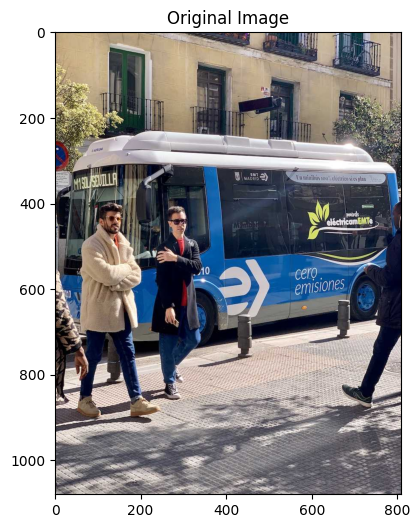

In [54]:
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(source)
#plt.axis('off')  # This turns off the axis numbers
plt.title("Original Image")
plt.show()

In [55]:
# Run inference on the source
results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)


0: 640x480 4 persons, 1 bus, 7748.5ms
Speed: 429.8ms preprocess, 7748.5ms inference, 184.9ms postprocess per image at shape (1, 3, 640, 480)


In [56]:
# Run inference again on the source
results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)


0: 640x480 4 persons, 1 bus, 2718.3ms
Speed: 36.5ms preprocess, 2718.3ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 480)


`Usually, the first time that an inference is run, the latency is greater. `

In [57]:
verbose = True
model = YOLO(model_path, task, verbose)

results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)


0: 640x480 4 persons, 1 bus, 2772.0ms
Speed: 35.4ms preprocess, 2772.0ms inference, 12.1ms postprocess per image at shape (1, 3, 640, 480)


`results` is a list. 

In [58]:
len(results)

1

In [59]:
result = results[0]
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [60]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 0., 0.])
conf: tensor([0.9402, 0.8882, 0.8783, 0.8558, 0.6219])
data: tensor([[3.8327e+00, 2.2936e+02, 7.9619e+02, 7.2841e+02, 9.4015e-01, 5.0000e+00],
        [6.7102e+02, 3.9483e+02, 8.0981e+02, 8.7871e+02, 8.8822e-01, 0.0000e+00],
        [4.7405e+01, 3.9957e+02, 2.3930e+02, 9.0420e+02, 8.7825e-01, 0.0000e+00],
        [2.2306e+02, 4.0869e+02, 3.4447e+02, 8.6044e+02, 8.5577e-01, 0.0000e+00],
        [2.1726e-02, 5.5607e+02, 6.8885e+01, 8.7236e+02, 6.2192e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[400.0136, 478.8882, 792.3619, 499.0480],
        [740.4135, 636.7728, 138.7925, 483.8794],
        [143.3527, 651.8801, 191.8959, 504.6299],
        [283.7633, 634.5622, 121.4086, 451.7471],
        [ 34.4536, 714.2138,  68.8637, 316.2908]])
xywhn: tensor([[0.4938, 0.4434, 0.9782, 0.4621],
        [0.9141, 0.5896, 0.1713, 0.4480],
        [0.17

In [61]:
result.boxes.cls

tensor([5., 0., 0., 0., 0.])

In [62]:
result.names[0]

'person'

In [63]:
result.names[5]

'bus'

In [64]:
result.boxes.conf

tensor([0.9402, 0.8882, 0.8783, 0.8558, 0.6219])

In [65]:
result.boxes.data

tensor([[3.8327e+00, 2.2936e+02, 7.9619e+02, 7.2841e+02, 9.4015e-01, 5.0000e+00],
        [6.7102e+02, 3.9483e+02, 8.0981e+02, 8.7871e+02, 8.8822e-01, 0.0000e+00],
        [4.7405e+01, 3.9957e+02, 2.3930e+02, 9.0420e+02, 8.7825e-01, 0.0000e+00],
        [2.2306e+02, 4.0869e+02, 3.4447e+02, 8.6044e+02, 8.5577e-01, 0.0000e+00],
        [2.1726e-02, 5.5607e+02, 6.8885e+01, 8.7236e+02, 6.2192e-01, 0.0000e+00]])

**Geometric Attributes**
- xywh: Tensor with bounding box coordinates in center_x, center_y, width, height format, in pixels.
- xywhn: Normalized center_x, center_y, width, height, scaled to the image dimensions, values in .
- xyxy: Tensor of boxes as x1, y1, x2, y2 in pixels, representing the top-left and bottom-right corners.
- xyxyn: Normalized x1, y1, x2, y2, scaled by image width and height, values in .

In [66]:
result.boxes.xyxy

tensor([[3.8327e+00, 2.2936e+02, 7.9619e+02, 7.2841e+02],
        [6.7102e+02, 3.9483e+02, 8.0981e+02, 8.7871e+02],
        [4.7405e+01, 3.9957e+02, 2.3930e+02, 9.0420e+02],
        [2.2306e+02, 4.0869e+02, 3.4447e+02, 8.6044e+02],
        [2.1726e-02, 5.5607e+02, 6.8885e+01, 8.7236e+02]])

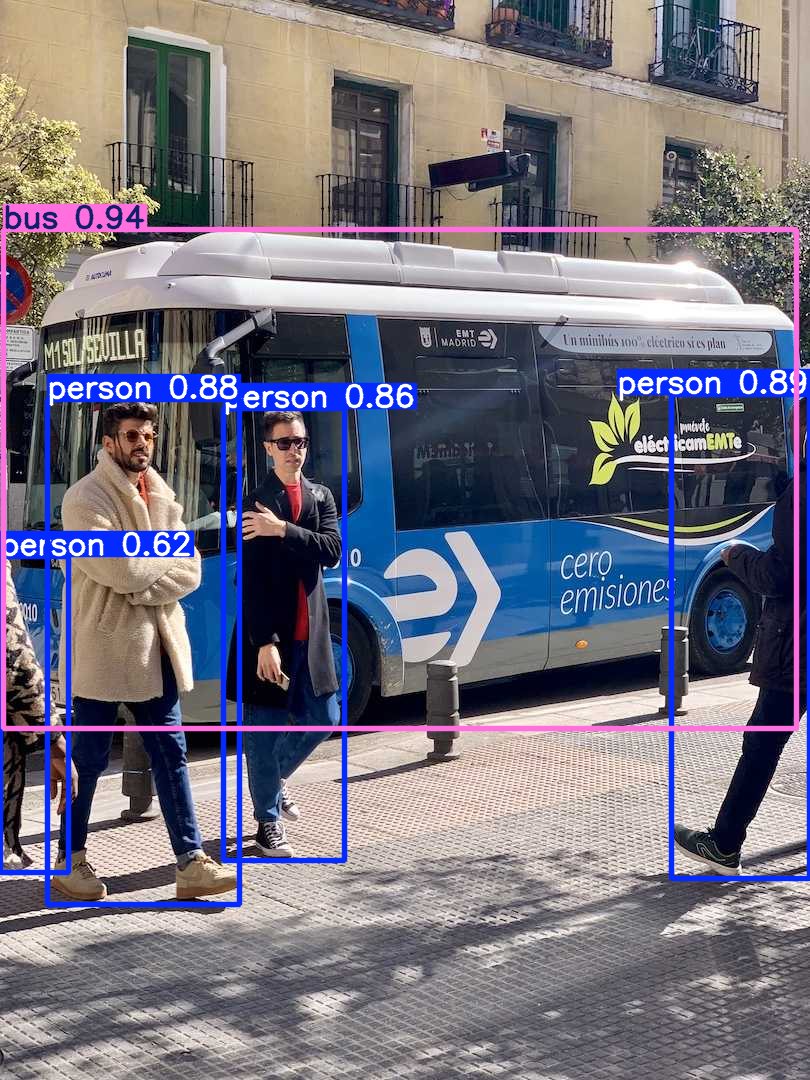

In [23]:
result.show()  # display to screen

In [67]:
im_bgr = result.plot()
img = Image.fromarray(im_bgr[..., ::-1])

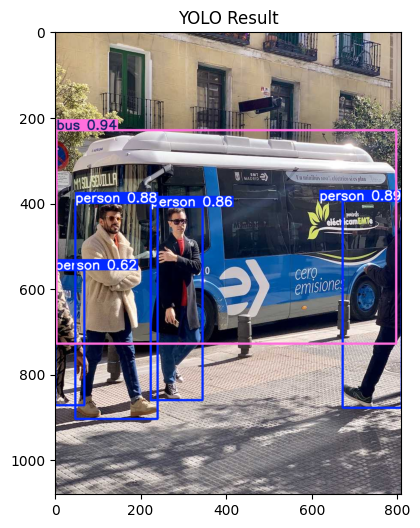

In [68]:
plt.figure(figsize=(6, 6))
plt.imshow(img)
#plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Result")
plt.show()

In [69]:
width, height = img.size
width, height

(810, 1080)

In [27]:
result.save(filename="bus_result.jpg")  # save to disk

'bus_result.jpg'

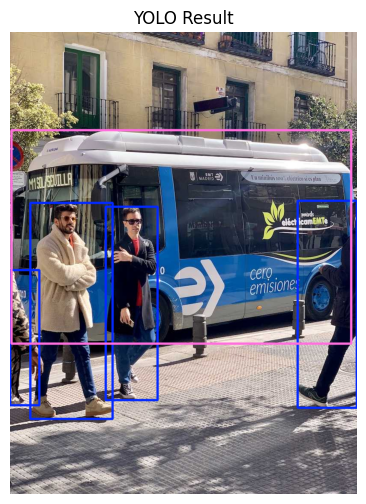

In [70]:
im_bgr = result.plot(boxes=True, labels=False, conf=False)
img = Image.fromarray(im_bgr[..., ::-1])

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Result")
plt.show()

In [28]:
ls ./images/

beatles.jpg  bus.jpg


In [29]:
source = Image.open("./images/beatles.jpg")

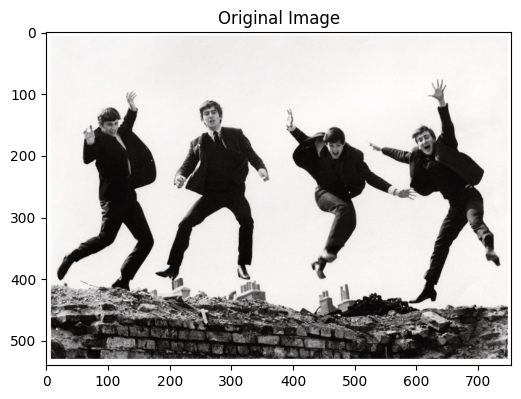

In [30]:
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(source)
#plt.axis('off')  # This turns off the axis numbers
plt.title("Original Image")
plt.show()

In [31]:
results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)
result = results[0]


0: 480x640 4 persons, 7446.5ms
Speed: 462.4ms preprocess, 7446.5ms inference, 174.8ms postprocess per image at shape (1, 3, 480, 640)


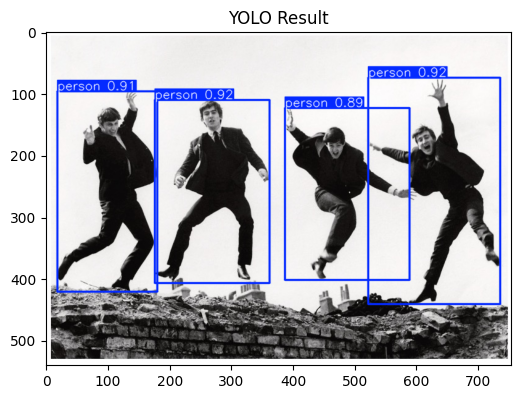

In [32]:
im_bgr = result.plot()
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
#plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Result")
plt.show()

The plot() method in Ultralytics YOLO Results object accepts several arguments to control what is visualized on the image, including boxes, masks, keypoints, confidences, labels, and more.
Common Arguments for plot()
- boxes (bool): Show/hide bounding boxes. Default is True.
- conf (bool): Show/hide confidence scores. Default is True.
- labels (bool): Show/hide class labels. Default is True.
- masks (bool): Show/hide segmentation masks (when available, e.g. in segment tasks).
- kpt_line (bool): Draw lines connecting pose keypoints (skeleton diagram). Default is True in pose tasks.
- line_width (int): Set annotation line thickness.
- font_size (int): Set font size for text annotations.
- show (bool): If True, immediately display the image (interactive environments).

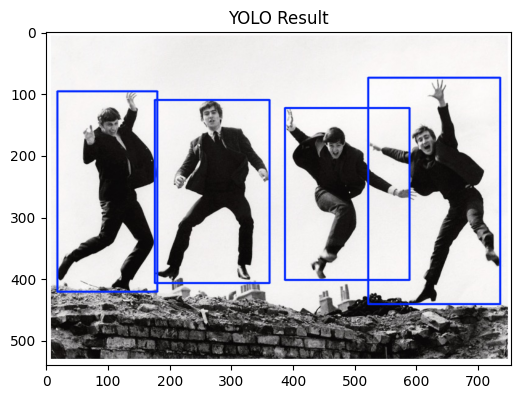

In [35]:
im_bgr = result.plot(boxes=True, labels=False, conf=False)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
#plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Result")
plt.show()

## Testing with other tasks

### Image Classification

In [2]:
model_path= "./models/yolo11n-cls.pt"
task = "classification"
verbose = True

In [3]:
# Load a pretrained classification model
model = YOLO(model_path, task, verbose)

In [4]:
source = Image.open("./images/bus.jpg")

In [5]:
results = model.predict(source, save=False)
result = results[0]


0: 224x224 minibus 0.57, police_van 0.34, trolleybus 0.04, recreational_vehicle 0.01, streetcar 0.01, 3355.1ms
Speed: 5233.9ms preprocess, 3355.1ms inference, 28.2ms postprocess per image at shape (1, 3, 224, 224)


In [11]:
classes = result.probs.top5
classes

[654, 734, 874, 757, 829]

In [37]:
probs = result.probs.top5conf
probs

tensor([0.5710, 0.3375, 0.0421, 0.0142, 0.0059])

In [38]:
probs = confs.tolist()
probs

[0.5710113048553467,
 0.33745330572128296,
 0.04209813103079796,
 0.014150412753224373,
 0.005880324635654688]

In [41]:
n=0
for id in classes:
    print(result.names[id], round (probs[n], 2))
    n=n+1

minibus 0.57
police_van 0.34
trolleybus 0.04
recreational_vehicle 0.01
streetcar 0.01


And we can have the top1 direcly:

In [45]:
print(result.names[result.probs.top1], round(result.probs.top1conf.tolist(), 2))

minibus 0.57


In [49]:
!ls ./images

1_box.jpg	   2-box.jpg	      beatles.jpg	     dog_1.jpg
2_box-1_wheel.jpg  2-wheel.jpg	      bus.jpg
2_box_2_wheel.jpg  3_box-4_wheel.jpg  cam_img_yolo_test.jpg


In [50]:
source = Image.open("./images/dog_1.jpg")

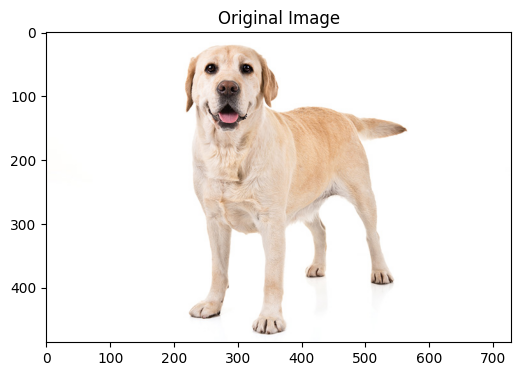

In [51]:
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(source)
#plt.axis('off')  # This turns off the axis numbers
plt.title("Original Image")
plt.show()

In [52]:
results = model.predict(source, save=False)
result = results[0]


0: 224x224 Labrador_retriever 0.73, golden_retriever 0.22, beagle 0.01, bull_mastiff 0.00, Brittany_spaniel 0.00, 285.3ms
Speed: 35.8ms preprocess, 285.3ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 224)


In [53]:
print(result.names[result.probs.top1], round(result.probs.top1conf.tolist(), 2))

Labrador_retriever 0.73


`Running the same image with MobileNetV2, we got 0.82 as the result confidence with a lower latency`

### Instance Segmentation

In [36]:
model_path= "./models/yolo11n-seg.pt"
task = "segment"
verbose = True

In [37]:
# Load a pretrained YOLO11n model
model = YOLO(model_path, task, verbose)

In [38]:
source = Image.open("./images/bus.jpg")

In [39]:
results = model.predict(source, save=False)
result = results[0]


0: 640x480 4 persons, 1 bus, 1 stop sign, 4695.4ms
Speed: 65.4ms preprocess, 4695.4ms inference, 174.7ms postprocess per image at shape (1, 3, 640, 480)


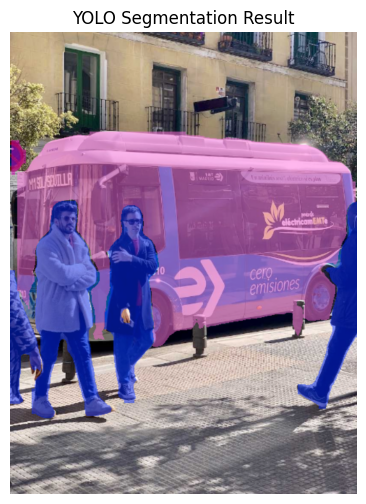

In [40]:
im_bgr = result.plot(boxes=False, conf=False, masks=True)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Segmentation Result")
plt.show()

In [41]:
source = Image.open("./images/beatles.jpg")

In [42]:
results = model.predict(source, save=False)
result = results[0]


0: 480x640 4 persons, 4246.0ms
Speed: 38.2ms preprocess, 4246.0ms inference, 47.4ms postprocess per image at shape (1, 3, 480, 640)


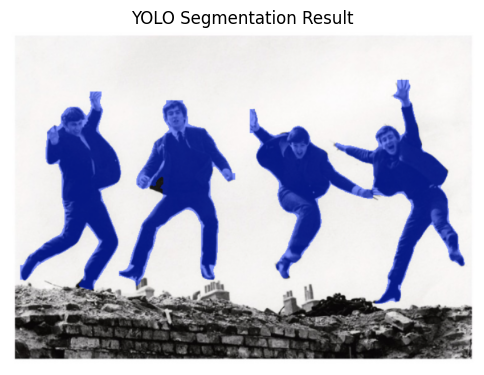

In [43]:
im_bgr = result.plot(boxes=False, conf=False, masks=True)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Segmentation Result")
plt.show()

### Pose Estimation

In [44]:
model_path= "./models/yolo11n-pose.pt"
task = "pose"
verbose = True

In [45]:
# Load a pretrained YOLO11n model
model = YOLO(model_path, task, verbose)

In [46]:
source = Image.open("./images/bus.jpg")

In [47]:
results = model.predict(source, save=False)
result = results[0]


0: 640x480 4 persons, 3175.5ms
Speed: 37.9ms preprocess, 3175.5ms inference, 15.7ms postprocess per image at shape (1, 3, 640, 480)


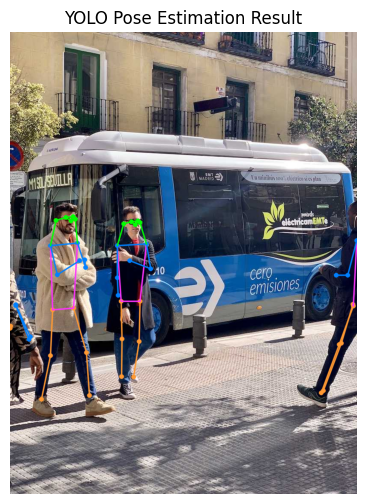

In [48]:
im_bgr = result.plot(boxes=False, conf=False, kpt_line=True)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Pose Estimation Result")
plt.show()

In [49]:
source = Image.open("./images/beatles.jpg")
results = model.predict(source, save=False)
result = results[0]


0: 480x640 4 persons, 3078.9ms
Speed: 33.5ms preprocess, 3078.9ms inference, 9.6ms postprocess per image at shape (1, 3, 480, 640)


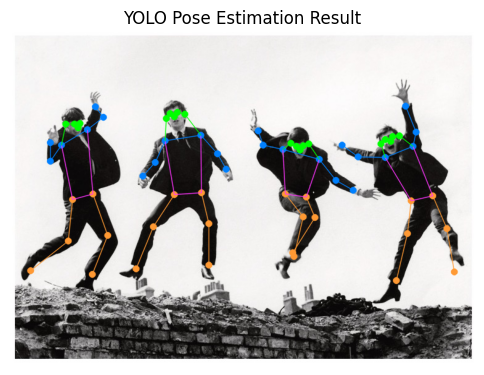

In [50]:
im_bgr = result.plot(boxes=False, conf=False, kpt_line=True)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Pose Estimation Result")
plt.show()

## Inference With The Trained Model

In [75]:
!ls ./models

best.pt		    yolo11n.pt		 yolov8n_ncnn_model
yolo11n_ncnn_model  yolo11n-seg.pt	 yolov8n.pt
yolo11n-pose.pt     yolo11n.torchscript  yolov8n.torchscript


In [104]:
model_path= "./models/best.pt"
task = "detect" 
verbose = True

In [105]:
# Load a pretrained YOLO11n model with a customized dataset
model = YOLO(model_path, task, verbose)

In [106]:
!ls ./images

1_box.jpg	   2_box_2_wheel.jpg  2-wheel.jpg	 beatles.jpg
2_box-1_wheel.jpg  2-box.jpg	      3_box-4_wheel.jpg  bus.jpg


In [107]:
# Open an image using PIL
source = Image.open("./images/1_box.jpg")

In [108]:
# Run inference on the source
results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)


0: 480x640 1 box, 6673.2ms
Speed: 568.2ms preprocess, 6673.2ms inference, 114.1ms postprocess per image at shape (1, 3, 480, 640)


In [109]:
result = results[0]

In [110]:
result.boxes.cls

tensor([0.])

In [111]:
result.names

{0: 'box', 1: 'wheel'}

In [112]:
result.boxes.conf

tensor([0.8998])

In [113]:
result.boxes.xyxy

tensor([[ 68.9659,   9.4915, 229.1566, 174.2289]])

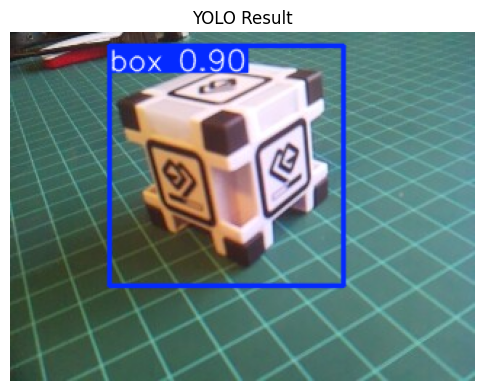

In [114]:
im_bgr = result.plot()
img = Image.fromarray(im_bgr[..., ::-1])

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Result")
plt.show()

### Creating a function

In [8]:
def infer_yolo(source, conf=0.5, iou=0.3):
    results = model.predict(source, save=False, imgsz=640, conf=conf, iou=iou)
    result = results[0]

    im_bgr = result.plot()
    img = Image.fromarray(im_bgr[..., ::-1])

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # This turns off the axis numbers
    plt.title("YOLO Result")
    plt.show()

In [116]:
!ls ./images

1_box.jpg	   2_box_2_wheel.jpg  2-wheel.jpg	 beatles.jpg
2_box-1_wheel.jpg  2-box.jpg	      3_box-4_wheel.jpg  bus.jpg



image 1/1 /home/mjrovai/Documents/YOLO/images/2_box-1_wheel.jpg: 256x320 2 boxs, 1 wheel, 1125.5ms
Speed: 5.2ms preprocess, 1125.5ms inference, 10.5ms postprocess per image at shape (1, 3, 256, 320)


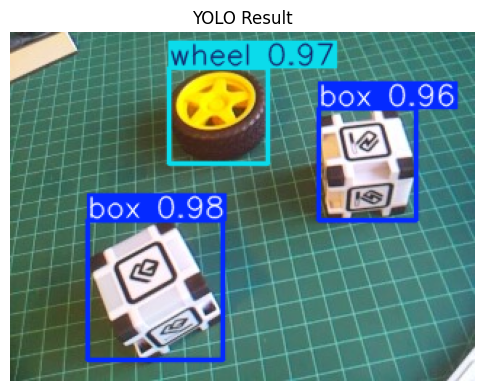

In [117]:
infer_yolo("./images/2_box-1_wheel.jpg")


image 1/1 /home/mjrovai/Documents/YOLO/images/2_box_2_wheel.jpg: 256x320 2 boxs, 2 wheels, 5169.3ms
Speed: 319.5ms preprocess, 5169.3ms inference, 322.4ms postprocess per image at shape (1, 3, 256, 320)


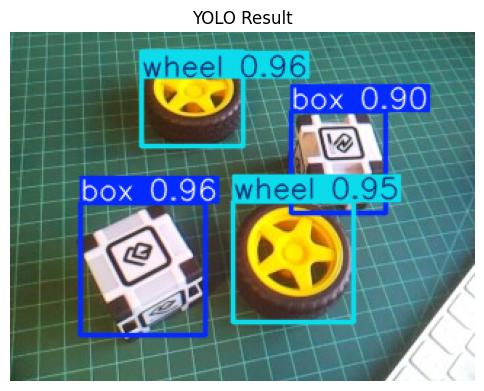

In [118]:
infer_yolo("./images/2_box_2_wheel.jpg")


image 1/1 /home/mjrovai/Documents/YOLO/images/2-box.jpg: 256x320 2 boxs, 839.8ms
Speed: 83.5ms preprocess, 839.8ms inference, 14.1ms postprocess per image at shape (1, 3, 256, 320)


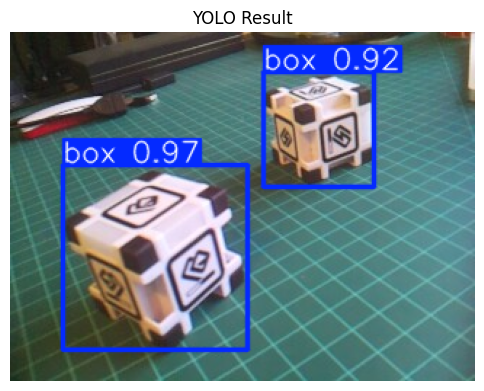

In [119]:
infer_yolo("./images/2-box.jpg")

### Exporting the model 

In [96]:
!yolo export model=./models/best.pt format=ncnn 

Ultralytics 8.3.191 🚀 Python-3.11.2 torch-2.8.0+cpu CPU (Cortex-A53)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'models/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.2 MB)

TorchScript: starting export with torch 2.8.0+cpu...
TorchScript: export success ✅ 45.0s, saved as 'models/best.torchscript' (10.3 MB)

NCNN: starting export with NCNN 1.0.20250503...
NCNN: running '/home/mjrovai/yolo/lib/python3.11/site-packages/ultralytics/pnnx models/best.torchscript ncnnparam=models/best_ncnn_model/model.ncnn.param ncnnbin=models/best_ncnn_model/model.ncnn.bin ncnnpy=models/best_ncnn_model/model_ncnn.py pnnxparam=models/best_ncnn_model/model.pnnx.param pnnxbin=models/best_ncnn_model/model.pnnx.bin pnnxpy=models/best_ncnn_model/model_pnnx.py pnnxonnx=models/best_ncnn_model/model.pnnx.onnx fp16=0 device=cpu inputshape="[1, 3, 640, 640]"'
pnnxparam = models/best_ncnn_model/model.pnnx.param
pnnxbin 

In [97]:
!ls ./models

best_ncnn_model   yolo11n_ncnn_model  yolo11n-seg.pt	   yolov8n.pt
best.pt		  yolo11n-pose.pt     yolo11n.torchscript  yolov8n.torchscript
best.torchscript  yolo11n.pt	      yolov8n_ncnn_model


In [127]:
model_path= "./models/best_ncnn_model"
task = "detect" 
verbose = True

In [128]:
# Load the converted ncnn model with a customized dataset
model = YOLO(model_path, task, verbose)

Loading ./models/best_ncnn_model for NCNN inference...

image 1/1 /home/mjrovai/Documents/YOLO/images/2-box.jpg: 640x640 2 boxs, 1441.4ms
Speed: 108.8ms preprocess, 1441.4ms inference, 962.9ms postprocess per image at shape (1, 3, 640, 640)


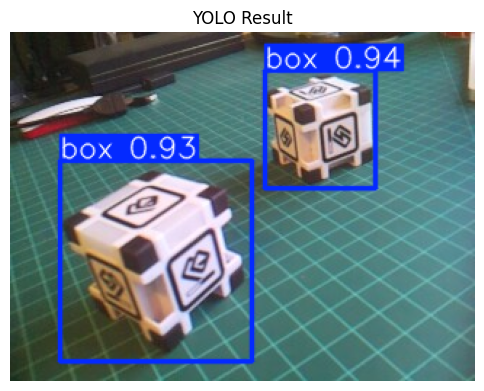

In [129]:
infer_yolo("./images/2-box.jpg")


image 1/1 /home/mjrovai/Documents/YOLO/images/1_box.jpg: 640x640 1 box, 1451.8ms
Speed: 70.7ms preprocess, 1451.8ms inference, 14.8ms postprocess per image at shape (1, 3, 640, 640)


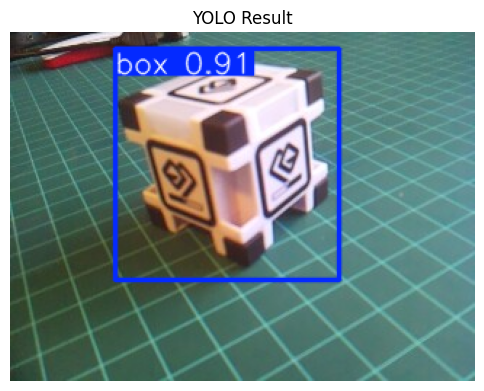

In [134]:
infer_yolo("./images/1_box.jpg")


image 1/1 /home/mjrovai/Documents/YOLO/images/3_box-4_wheel.jpg: 640x640 3 boxs, 4 wheels, 16340.6ms
Speed: 1913.9ms preprocess, 16340.6ms inference, 1383.8ms postprocess per image at shape (1, 3, 640, 640)


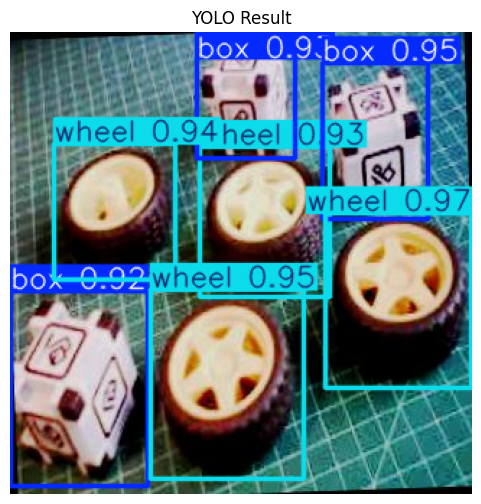

In [135]:
infer_yolo("./images/3_box-4_wheel.jpg")

## Using camera

In [1]:
from picamera2 import Picamera2

In [2]:
def capture_image(image_path):
    
  # Initialize camera
  picam2 = Picamera2() # default is index 0

  # Configure the camera
  config = picam2.create_still_configuration(main={"size": (320, 320)})
  picam2.configure(config)
  picam2.start()

  # Wait for the camera to warm up
  time.sleep(2)

  # Capture image
  picam2.capture_file(image_path)
  print("Image captured: "+image_path)

  # Stop camera
  picam2.stop()
  picam2.close()

In [3]:
img_path = './images/cam_img_yolo_test.jpg'
model_path = "./models/best_ncnn_model"
task = "detect" 
verbose = False

In [6]:
# Load the converted ncnn model with a customized dataset
model = YOLO(model_path, task, verbose)

[65:29:29.673574409] [5691]  INFO Camera camera_manager.cpp:326 libcamera v0.5.1+100-e53bdf1f
[65:29:32.016459397] [5737]  WARN RPiSdn sdn.cpp:40 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[65:29:32.054522983] [5737]  INFO RPI vc4.cpp:440 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media2 and ISP device /dev/media0
[65:29:32.062724313] [5737]  INFO RPI pipeline_base.cpp:1107 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[65:29:32.549825997] [5691]  INFO Camera camera.cpp:1205 configuring streams: (0) 320x320-BGR888/sRGB (1) 640x480-SGBRG10_CSI2P/RAW
[65:29:32.551743804] [5737]  INFO RPI vc4.cpp:615 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10 - Selected unicam format: 640x480-pGAA


Image captured: ./images/cam_img_yolo_test.jpg

image 1/1 /home/mjrovai/Documents/YOLO/images/cam_img_yolo_test.jpg: 640x640 2 wheels, 7298.9ms
Speed: 933.9ms preprocess, 7298.9ms inference, 877.1ms postprocess per image at shape (1, 3, 640, 640)


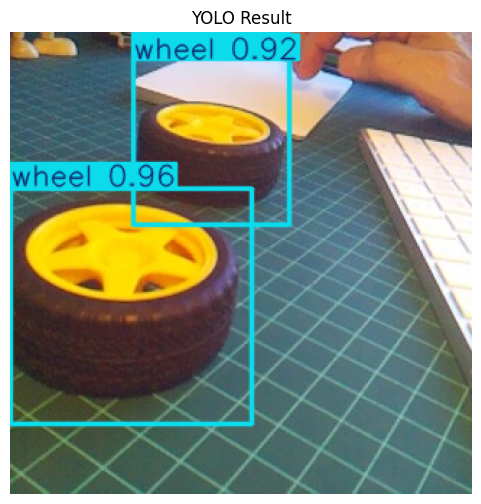

In [10]:
capture_image(img_path)
infer_yolo("./images/cam_img_yolo_test.jpg")

In [11]:
model_path = "./models/best.pt"

[65:32:44.410058758] [5853]  INFO Camera camera_manager.cpp:326 libcamera v0.5.1+100-e53bdf1f
[65:32:44.490685605] [5869]  WARN RPiSdn sdn.cpp:40 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[65:32:44.496271113] [5869]  INFO RPI vc4.cpp:440 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media2 and ISP device /dev/media0
[65:32:44.496382779] [5869]  INFO RPI pipeline_base.cpp:1107 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[65:32:44.521725847] [5853]  INFO Camera camera.cpp:1205 configuring streams: (0) 320x320-BGR888/sRGB (1) 640x480-SGBRG10_CSI2P/RAW
[65:32:44.522443918] [5869]  INFO RPI vc4.cpp:615 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10 - Selected unicam format: 640x480-pGAA


Image captured: ./images/cam_img_yolo_test.jpg

image 1/1 /home/mjrovai/Documents/YOLO/images/cam_img_yolo_test.jpg: 640x640 2 boxs, 2 wheels, 759.4ms
Speed: 42.9ms preprocess, 759.4ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 640)


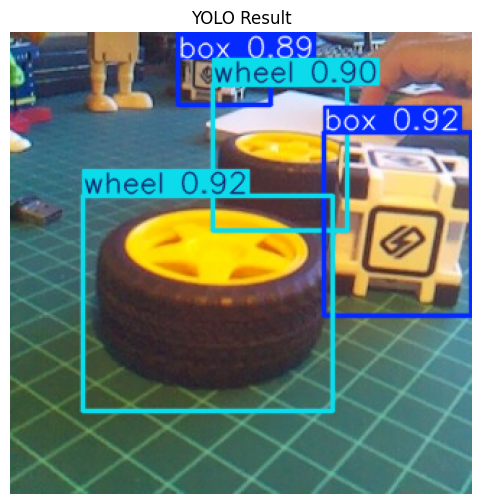

In [13]:
capture_image(img_path)
infer_yolo("./images/cam_img_yolo_test.jpg")

NOTE: The Yolo11 works better w/o ncnn (lower Latency)